In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [21]:
mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [23]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [34]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="same")

model = tf.keras.models.Sequential([
    my_conv_layer(16,(3,3),padding="same",input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2,2),
    my_conv_layer(32,(3,3)),
    tf.keras.layers.AveragePooling2D(2,2),
    my_conv_layer(64,(3,3)),
    tf.keras.layers.Flatten(),
    my_dense_layer(64),
    my_dense_layer(10, activation="softmax")
])

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.5040 - accuracy: 0.8232 - val_loss: 0.3652 - val_accuracy: 0.8738
Epoch 2/10
55000/55000 [==============================] - 60s 1ms/sample - loss: 0.3444 - accuracy: 0.8831 - val_loss: 0.3336 - val_accuracy: 0.8890
Epoch 3/10
55000/55000 [==============================] - 55s 992us/sample - loss: 0.3038 - accuracy: 0.8986 - val_loss: 0.2756 - val_accuracy: 0.9090
Epoch 4/10
55000/55000 [==============================] - 54s 990us/sample - loss: 0.2779 - accuracy: 0.9086 - val_loss: 0.2842 - val_accuracy: 0.9058
Epoch 5/10
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.2608 - accuracy: 0.9154 - val_loss: 0.2630 - val_accuracy: 0.9128
Epoch 6/10
55000/55000 [==============================] - 75s 1ms/sample - loss: 0.2448 - accuracy: 0.9221 - val_loss: 0.2512 - val_accuracy: 0.9206
Epoch 7/10
55000/55000 [=============================

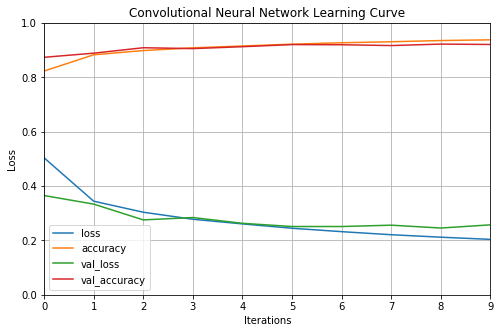

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,9)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convolutional Neural Network Learning Curve')
plt.savefig('CNN_Learning_Curve.png')
plt.show()

In [38]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5284    0   60   34    9    1  153    0    2    0]
 [   2 5412    1   24    3    0    1    0    1    0]
 [  39    1 5160   29  155    0  111    0    1    0]
 [  96    2   10 5228  123    0   40    0    0    0]
 [   5    2  312   61 5012    0  119    0    1    0]
 [   0    0    0    0    0 5443    0   55    1    8]
 [ 573    2  247   51  237    0 4395    0    2    0]
 [   0    0    0    0    0    2    0 5421    0   65]
 [   5    1    0    3   12    0    9    2 5476    2]
 [   0    0    0    0    0   14    0  113    0 5367]]


In [39]:
model.evaluate(X_test, y_test)

ValueError: Error when checking input: expected conv2d_15_input to have 4 dimensions, but got array with shape (10000, 28, 28, 1, 1)

In [12]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[ 968    0    1    0    0    2    5    1    2    1]
 [   0 1129    2    1    0    0    2    1    0    0]
 [   2    2 1018    2    1    0    0    5    1    1]
 [   0    0    1 1001    0    3    0    1    3    1]
 [   0    0    2    1  964    0    2    0    1   12]
 [   2    0    0   17    0  865    6    0    1    1]
 [   1    3    1    0    1    1  950    0    1    0]
 [   0    2    6    8    1    0    0 1008    1    2]
 [   3    0    4   15    3    0    0    1  945    3]
 [   1    3    0    6    5    3    0    3    3  985]]


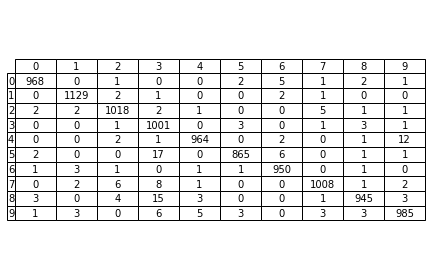

In [13]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat_cnn.png', dpi=600)